In [ ]:
#한글 폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 69 not upgraded.


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
#한국어 자연어처리 konlpy와 형태소 분석기 Mecab설치
!set -x\
&& pip install konlpy\
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

In [ ]:
#자료 가져오기
import pandas as pd
import numpy as np

#형태소분석 -> 명사추출
import konlpy
from konlpy.tag import Mecab, Okt
tagger = Mecab()

df = pd.read_excel('220226_kci_api_한국기독교교육정보학회_크롤링(2002_2021).xlsx')

posts = df.get('국문제목')

nouns=[]
for post in posts:
    for noun in tagger.nouns(post):
        nouns.append(noun)

nouns[:10]  

['정보', '시대', '신학', '교육', '방향', '전망', '글로벌', '정보', '사회', '전개']

In [ ]:
#불용어제거 후 형태소 분석 다시실시: 조사, 빈도가 너무 큰 단어 등 제거
stop_words = '연구 이 본 기독교 교육 교회 중심 정보'
stop_words = stop_words.split(' ')

nouns = []

for post in posts:
    for noun in tagger.nouns(post):
        if noun not in stop_words:
            nouns.append(noun)

############################## 저장을 위함
save_nouns = []
for post in posts:
    for noun in tagger.nouns(post):
        save_nouns.append(noun)

# 빈도분석

In [ ]:
#단어 빈도수 측정
from collections import Counter

nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
print(top_nouns)
top_nouns_df = pd.DataFrame.from_dict(top_nouns, orient='index', columns=['freq'])
top_nouns_df.to_excel('220301_한국기독교교육정보학회_키워드빈도(불용어제거).xlsx')

################################# 저장을 위함
save_nouns_counter = Counter(save_nouns)
snc_df = pd.DataFrame.from_dict(save_nouns_counter, orient='index', columns= ['freq'])
snc_df.to_excel('220301_한국기독교교육정보학회_키워드빈도(전체).xlsx')

{'한국': 62, '학교': 61, '신앙': 58, '신학': 54, '과정': 52, '시대': 50, '개발': 50, '대학': 50, '청소년': 43, '교사': 42, '영성': 40, '문화': 40, '분석': 39, '고찰': 38, '학습': 37, '공동체': 37, '사회': 36, '종교': 36, '과제': 35, '프로그램': 34, '기독': 34, '예배': 31, '관점': 31, '관계': 30, '부모': 29, '방향': 28, '이해': 28, '영향': 28, '활용': 28, '목회': 27, '방안': 26, '유아': 25, '이론': 25, '성서': 25, '대안': 24, '적용': 24, '형성': 23, '코메니우스': 23, '방법': 22, '기초': 22, '인식': 22, '디지털': 21, '사상': 20, '사례': 20, '가정': 20, '대학생': 19, '모형': 19, '교수': 19, '수업': 19, '모색': 18}


In [ ]:
pd.DataFrame.from_dict(top_nouns, orient='index', columns=['freq'])

,freq
한국,62
학교,61
신앙,58
신학,54
과정,52
시대,50
개발,50
대학,50
청소년,43
교사,42


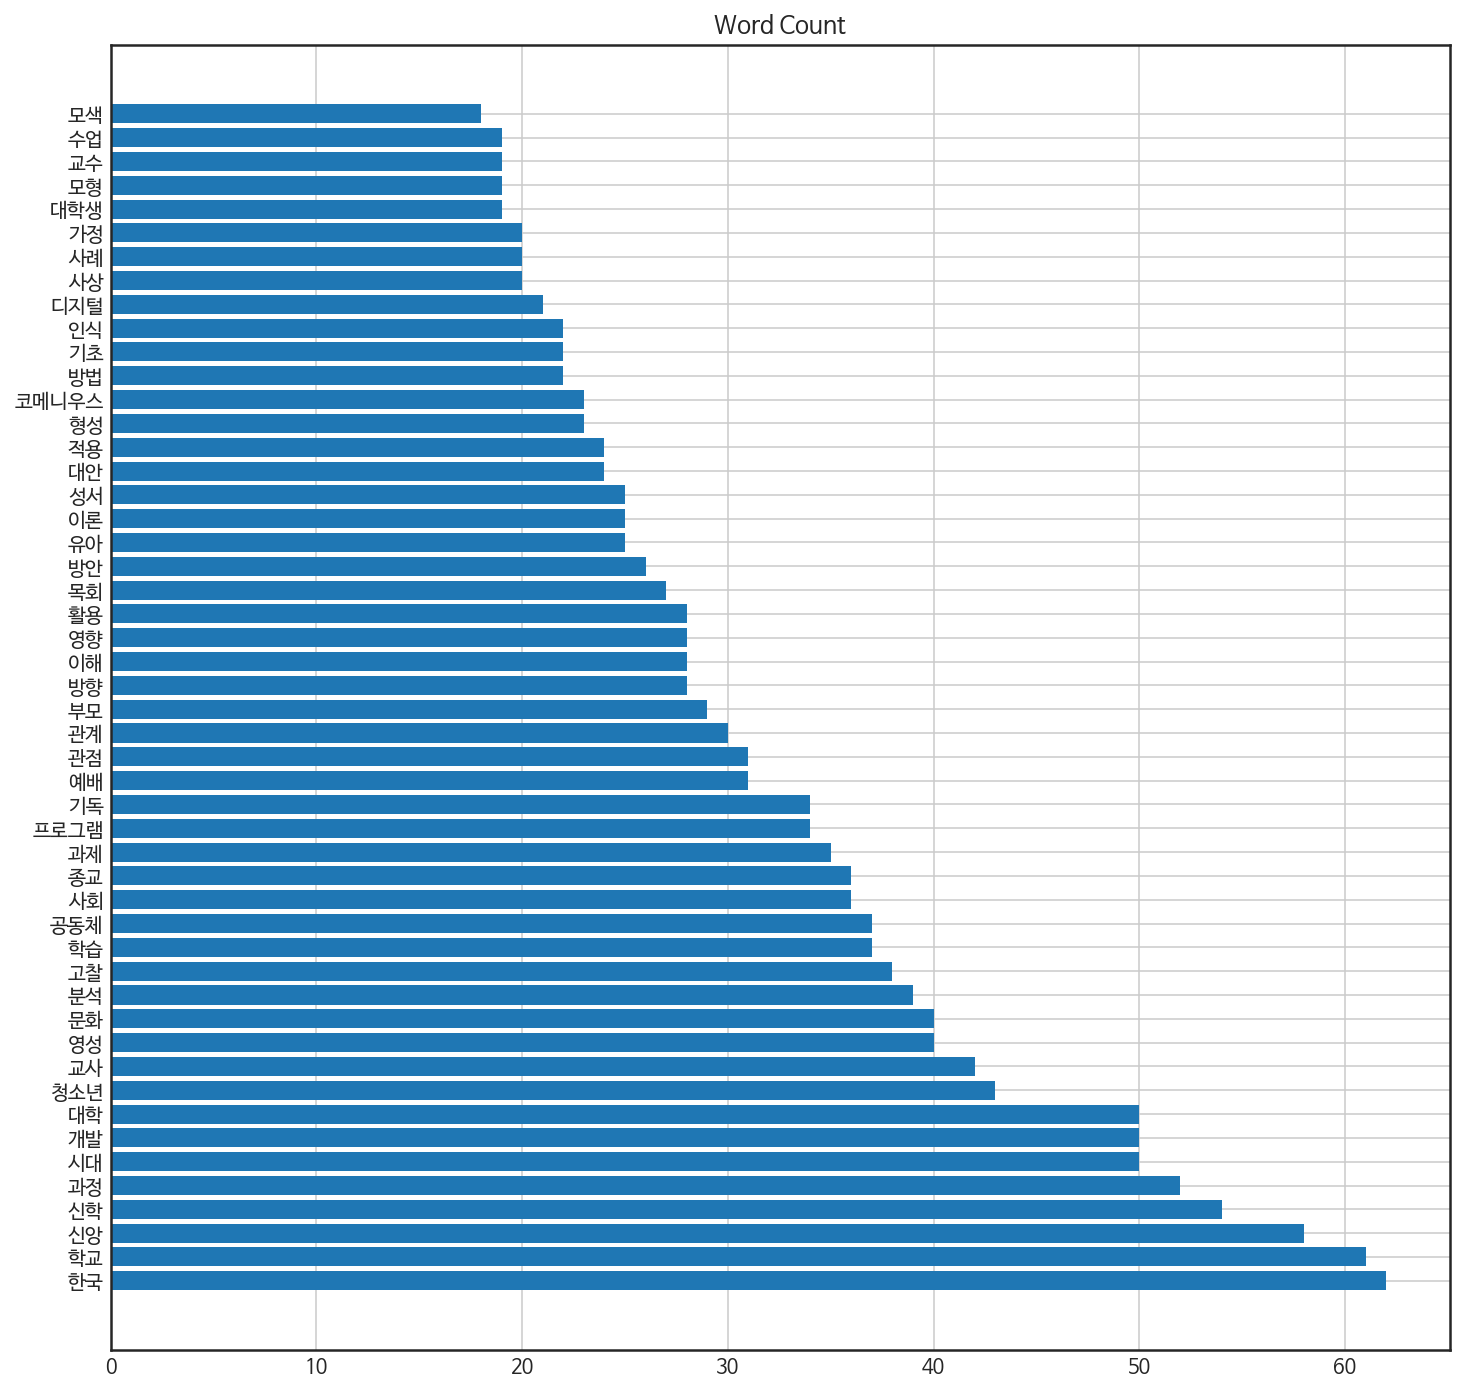

In [ ]:
#단어빈도 시각화
import numpy as np
y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12, 12))
plt.barh(y_pos, top_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_nouns.keys())

plt.grid()
plt.savefig('220301_한국기독교교육정보학회_키워드빈도(불용어제거)_시각화.png')

plt.show()

In [ ]:
#워드클라우드
!pip install wordcloud

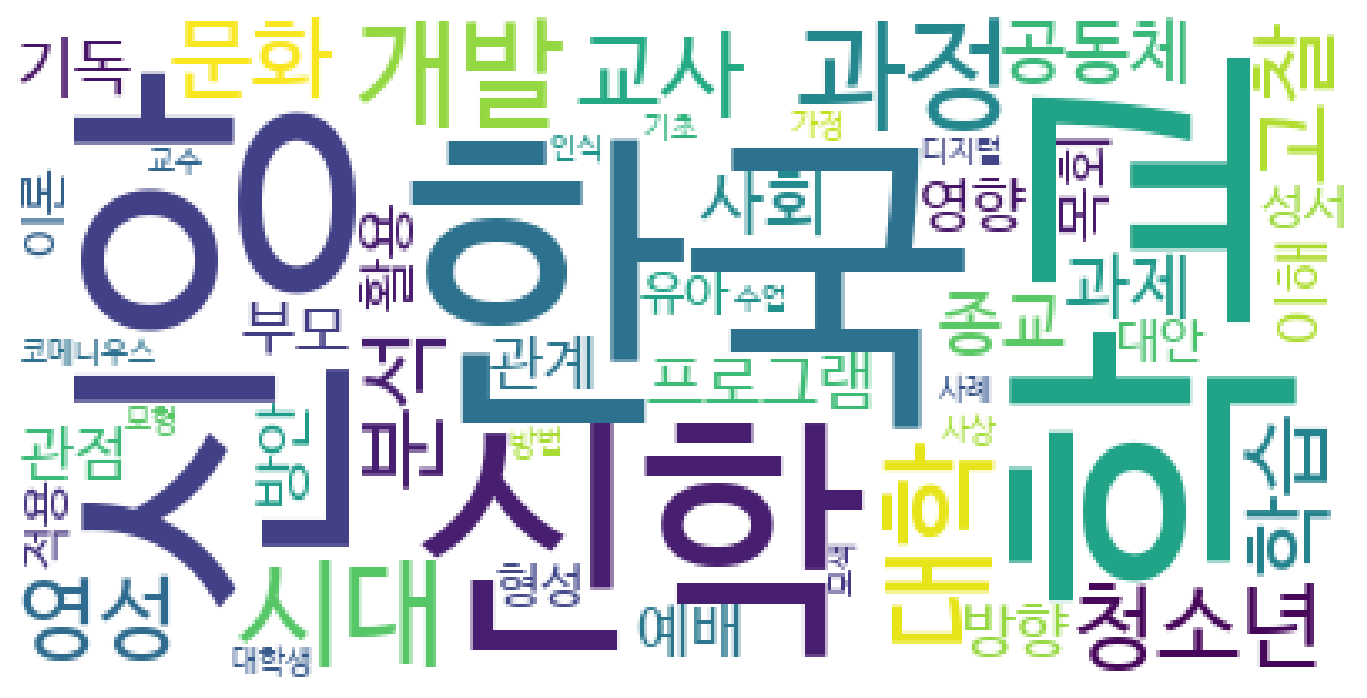

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns)
wc.to_file('220228_한국기독교교육학회_키워드빈도(불용어제거)_워드클라우드.png')


figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(111)
ax.axis('off')
ax.imshow(wc)

In [ ]:
#squarify 트리맵 시각화 -> 영역과 색에 따라 중요도 판단
!pip install squarify

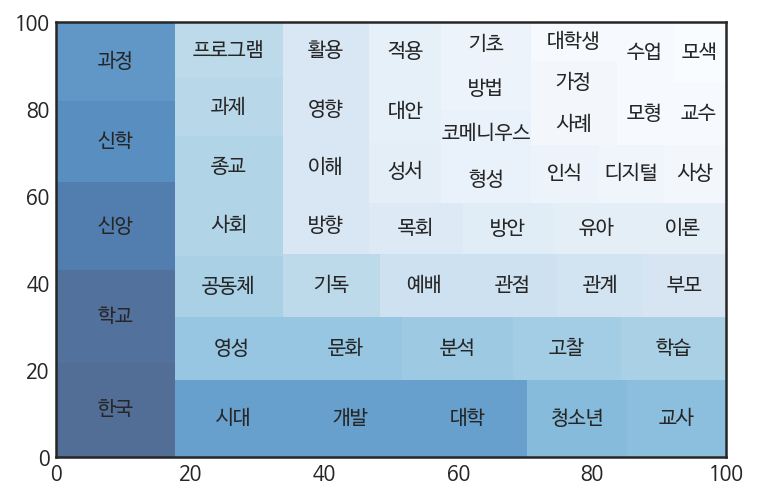

In [ ]:
import squarify

norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            vmax=max(top_nouns.values()))
colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]

squarify.plot(label = top_nouns.keys(),
              sizes = top_nouns.values(),
              color = colors,
              alpha = .7)

plt.savefig('220301_한국기독교교육정보학회_키워드빈도(불용어제거)_squarify.png')

##의미연결망분석

In [ ]:
nouns2 = []
for post in posts:
    nouns1 = []
    for noun in tagger.nouns(post):
        if noun not in stop_words and len(noun)>1:
            nouns1.append(noun)

    if len(nouns1) > 1:
        nouns2.append(nouns1)

nouns2

In [ ]:
import numpy as np

import nltk
nltk.download('punkt')

from nltk import bigrams #bgrams
from nltk import ConditionalFreqDist #co-occurence

from nltk.util import ngrams #tgrams, qgrams

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##동시출현빈도분석

In [ ]:
brams = [bigrams(x) for x in nouns2]

token = []
for i in brams:
    token += ([x for x in i])

#동시출현빈도분석
cfd = ConditionalFreqDist(token)

#특정단어의 동시출현빈도
print(cfd['현장']['지향'])

#특정단어와 동시출현빈도가 높은것 2개
print(cfd['현장'].most_common(2))

0
[('목회', 1), ('청소년', 1)]


In [ ]:
#동시출현빈도 행렬
freq_matrix = []

for i in cfd.keys():
    temp =[]
    for j in cfd.keys():
        temp.append(cfd[i][j])
    freq_matrix.append(temp)

#행렬로 변환
freq_matrix = np.array(freq_matrix)
# print(cfd.keys())
# print(freq_matrix)

#동시출현빈도 dataframe
cfd_df = pd.DataFrame(freq_matrix, index=cfd.keys(), columns=cfd.keys())
cfd_df.style.background_gradient(cmap='coolwarm')
# cfd_df.head(10)

Output hidden; open in https://colab.research.google.com to view.

##동시출현빈도 기반 그래프 작성

In [ ]:
import networkx as nx

G = nx.from_pandas_adjacency(cfd_df)

print(G.nodes())
print(G.edges())

#각 엣지의 가중치에 단어간의 빈도가 사용됨을 확인
# print(G.edges()[('현장', '지향')])

#시각화
nx.draw(G, with_labels=True);

##중심성
* 연결중심성(Degree Centrality)
* 위세중심성(Eigenvector Centrality)
* 근접중심성(Closeness Centrality)
* 매개중심성(betweenness Centrality)
* Pagerank

In [ ]:
#연결중심성
print('연결중심성')
dc = nx.degree_centrality(G).values()

print('위세중심성')
ec = nx.eigenvector_centrality(G, weight='weight').values()

print('근접중심성')
cc = nx.closeness_centrality(G, distance='weight').values()

print('매개중심성')
bc = nx.betweenness_centrality(G).values()

print('pagerank')
pr = nx.pagerank(G).values()

In [ ]:
#노드 사이즈 계산
def get_node_size(node_values):
    nsize = np.array([v for v in node_values])
    nsize = 1000 * (nsize-min(nsize)) / (max(nsize) - min(nsize))

    return nsize

In [ ]:
plt.figure(figsize=(14, 20))
plt.axis('off')

plt.subplot(321)
plt.title('Normal', fontsize=16)
nx.draw_networkx(G, font_size=16, alpha=.7, cmap=plt.cm.Blues)

plt.subplot(322)
plt.title('Degree Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16, alpha=.7, cmap=plt.cm.Blues,
                 node_color=list(dc), node_size=get_node_size(dc))

plt.subplot(323)
plt.title('EigenVector Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16, alpha=.7, cmap=plt.cm.Blues,
                 node_color=list(ec), node_size=get_node_size(ec))

plt.subplot(324)
plt.title('Closeness Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16, alpha=.7, cmap=plt.cm.Blues,
                 node_color=list(cc), node_size=get_node_size(cc))

plt.subplot(325)
plt.title('Betweenness Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16, alpha=.7, cmap=plt.cm.Blues,
                 node_color=list(bc), node_size=get_node_size(bc))

plt.subplot(326)
plt.title('PageRank', fontsize=16)
nx.draw_networkx(G, font_size=16, alpha=.7, cmap=plt.cm.Blues,
                 node_color=list(pr), node_size=get_node_size(pr))

plt.show()

In [ ]:
#layout 변환
# pl = nx.planar_layout(G)
frl = nx.fruchterman_reingold_layout(G)
sl = nx.spectral_layout(G)
rl = nx.random_layout(G)
sl2 = nx.shell_layout(G)
bl = nx.bipartite_layout(G, G.nodes())
cl = nx.circular_layout(G)
sl3 = nx.spring_layout(G)
kkl = nx.kamada_kawai_layout(G)

option = {'font_size': 16,
          'node_color': list(pr),
          'node_size': get_node_size(pr),
          'alpha': .7,
          'cmap': plt.cm.Blues}

plt.figure(figsize=(15, 15))
plt.axis('off')

# plt.subplot(331)
# plt.title('planar_layout', fontsize=16)
# nx.draw_networkx(G, pos=pl, **option)

plt.subplot(332)
plt.title('fruchterman_reingold_layout', fontsize=16)
nx.draw_networkx(G, pos=frl, **option)

plt.subplot(333)
plt.title('spectral_layout', fontsize=16)
nx.draw_networkx(G, pos=sl, **option)

plt.subplot(334)
plt.title('random_layout', fontsize=16)
nx.draw_networkx(G, pos=rl, **option)

plt.subplot(335)
plt.title('shell_layout', fontsize=16)
nx.draw_networkx(G, pos=sl2, **option)

plt.subplot(336)
plt.title('bipartite_layout', fontsize=16)
nx.draw_networkx(G, pos=bl, **option)

plt.subplot(337)
plt.title('circular_layout', fontsize=16)
nx.draw_networkx(G, pos=cl, **option)

plt.subplot(338)
plt.title('spring_layout', fontsize=16)
nx.draw_networkx(G, pos=sl3, **option)

plt.subplot(339)
plt.title('kamada_kawai_layout', fontsize=16)
nx.draw_networkx(G, pos=kkl, **option)

plt.show();